In [6]:
#Importamos las librerias necesarias
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
# Definimos la matriz de adyacencia
G = [
    [(1, 5), (4, 10)],
    [(0, 10), (4, 10), (2,10)],
    [(1, 6), (3, 8)],
    [(2, 10), (4, 9), (5, 7), (6,10)],
    [(0, 7), (1, 10), (3, 10), (5,10)],
    [(3, 10), (4, 7), (6,10)],
    [(3, 10), (5, 10)]
]

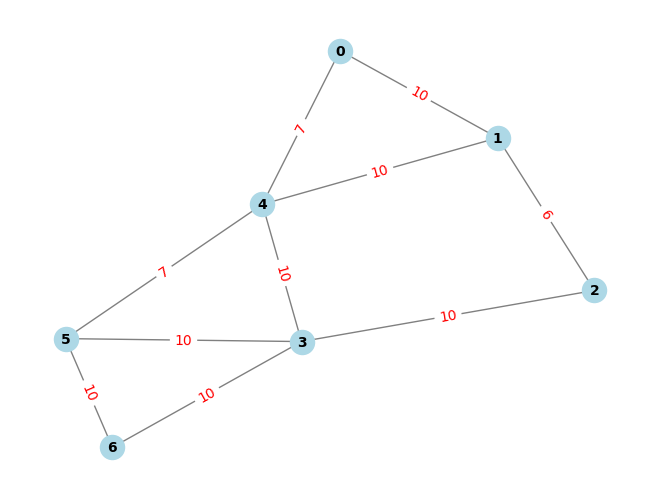

In [8]:
#Grafo

Grafo = nx.Graph()

# Agregamos nodos al grafo
for i in range(len(G)):
    Grafo.add_node(i)

# Agregamos aristas al grafo
for i in range(len(G)):
    for j in range(len(G[i])):
        Grafo.add_edge(i, G[i][j][0], weight=G[i][j][1])

# Imprimimos el grafo
#print(Grafo.edges(data=True))

# Graficamos el grafo
pos = nx.spring_layout(Grafo)
nx.draw(Grafo, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=1, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(Grafo, 'weight')
nx.draw_networkx_edge_labels(Grafo, pos, edge_labels=edge_labels, font_color='red')

# Mostramos el gráfico
plt.show()

In [9]:
#Cálculos

# Cálculo de la cantidad total pagada por las unidades móviles
cantidad_pagos = sum([Grafo[i][j]['weight'] for i in range(len(Grafo)) for j in Grafo[i]])

# Cálculo del total pagado por cada unidad móvil
M = [[0] * len(Grafo) for _ in range(len(Grafo))]
for i in range(len(Grafo)):
    for j, w in Grafo[i].items():
        M[i][j] += 1

total_por_unidad = []

for unidad in range(len(Grafo)):
    total_unidad = 0
    for i in range(len(Grafo)):
        for j, w in Grafo[i].items():
            if j == unidad:
                total_unidad += M[i][j] * w['weight']
    total_por_unidad.append(total_unidad)

In [10]:
#Dijkstra

#Usaremos el algoritmo de Dijkstra para encontrar el camino más corto entre dos nodos

def dijkstra(G, s):
    n = len(G)
    visitado = [False] * n
    distancia = [float('inf')] * n
    padre = [None] * n
    distancia[s] = 0
    for _ in range(n):
        u = min([(distancia[i], i) for i in range(n) if not visitado[i]])[1]
        visitado[u] = True
        for v, w in G[u].items():
            if distancia[u] + w['weight'] < distancia[v]:
                distancia[v] = distancia[u] + w['weight']
                padre[v] = u
    return distancia, padre

#Cálculo de la ruta más corta entre dos nodos

def ruta_mas_corta(G, s, t):
    distancia, padre = dijkstra(G, s)
    ruta = []
    u = t
    while padre[u] is not None:
        ruta.insert(0, u)
        u = padre[u]
    ruta.insert(0, u)
    return ruta


In [11]:
#Mostramos los resultados
print("La cantidad total pagada por las unidades móviles es: ", cantidad_pagos)
print("El total pagado por cada unidad móvil es: ", total_por_unidad)

La cantidad total pagada por las unidades móviles es:  180
El total pagado por cada unidad móvil es:  [17, 26, 16, 40, 34, 27, 20]


In [12]:
#Extra

#Mostramos la ruta más corta entre dos nodos

print("La ruta más corta entre los nodos 0 y 6 es: ", ruta_mas_corta(Grafo, 0, 6))

La ruta más corta entre los nodos 0 y 6 es:  [0, 4, 5, 6]
